In [1]:
# import packages
from pathlib import Path
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib.pyplot import figure
import editdistance
from helper_results import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set font for graphs: paper used font size 60
font = {'family' : 'STIXGeneral',
        'weight' : 'normal',
        'size'   : 40}
matplotlib.rc('font', **font)

In [3]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [4]:
# path for the spelling correction dictionaries post data processing
input_path_files = "../input_files/spelling_correction_dicts"

# Results of Spelling Correction Methods - Scores and Overlap

## Table of Contents
1. [Introduction](#introduction)<br/>
    1.1 [Function Definition](#functions)<br/>
2. [Holbrook Dataset](#holbrook)<br/>
    2.1 [Holbrook Scores](#holbrook_scores)<br/>
    2.2 [Holbrook Overlap - PySpell vs S-capade](#holbrook_overlap_pyspell_cmu)<br/>
    2.3 [Holbrook Overlap - SymSpell vs S-capade](#holbrook_overlap_symspell_cmu)<br/>
    2.4 [Holbrook Overlap - Aspell vs S-capade](#holbrook_overlap_aspell_cmu)<br/>
3. [Birkbeck Dataset](#birkbeck)<br/>
    3.1 [Birkbeck Scores](#birkbeck_scores)<br/>
    3.2 [Birbeck Overlap - PySpell vs S-capade](#birkbeck_overlap_pyspell)<br/>
    3.3 [Birkbeck Overlap - SymSpell vs S-capade](#birkbeck_overlap_symspell)<br/>
    3.4 [Birkbeck Overlap - Aspell vs S-capade](#birkbeck_overlap_aspell)<br/>
4. [Zeeko Dataset](#zeeko)<br/>
    4.1 [Zeeko Scores](#zeeko_scores)<br/>
    4.2 [Zeeko Overlap - PySpell vs S-capade](#zeeko_overlap_pyspell)<br/>
    4.3 [Zeeko Overlap - SymSpell vs S-capade](#zeeko_overlap_symspell)<br/>
    4.4 [Zeeko Overlap - Aspell vs S-capade](#zeeko_overlap_aspell)
5. [Aspell Dataset](#aspell)<br/>
    5.1 [Aspell Scores](#aspell_scores)<br/>
    5.2 [Aspell Overlap - PySpell vs S-capade](#aspell_overlap_pyspell_cmu)<br/>
    5.3 [Aspell Overlap - SymSpell vs S-capade](#aspell_overlap_symspell_cmu)<br/>
    5.4 [Aspell Overlap - Aspell vs S-capade](#aspell_overlap_aspell_cmu)<br/>
6. [Wikipedia Dataset](#wiki)<br/>
    6.1 [Wikipedia Scores](#wiki_scores)<br/>
    6.2 [Wikipedia Overlap - PySpell vs S-capade](#wiki_overlap_pyspell)<br/>
    6.3 [Wikipedia Overlap - SymSpell vs S-capade](#wiki_overlap_symspell)<br/>
    6.4 [Wikipedia Overlap - Aspell vs S-capade](#wiki_overlap_aspell)<br/>
7. [Corrections Made - Direct Dictionary Lookup vs Acoustic Distance](#direct_vs_distance)<br/>
    7.1 [Holbrook Dataset - S-capade Lookups vs  Acoustic Distance](#direct_vs_distance_holbrook)<br/>
    7.2 [Birkbeck Dataset - S-capade Lookups vs  Acoustic Distance](#direct_vs_distance_birkbeck)<br/>
    7.3 [Zeeko Dataset - S-capade Lookups vs  Acoustic Distance](#direct_vs_distance_zeeko)<br/>
    7.4 [Aspell Dataset - S-capade Lookups vs  Acoustic Distance](#direct_vs_distance_aspell)<br/>
    7.5 [Wikipedia Dataset - S-capade Lookups vs  Acoustic Distance](#direct_vs_distance_wiki)<br/>
8. [Edit Distance Greater Than 2 - Interesting Word Corrections](#interesting)<br/>
    8.1 [Holbrook Dataset: S-capade Corrections Greater than 2 Character Edit Distance](#interesting_holbrook)<br/>
    8.2 [Birkbeck Dataset: S-capade Corrections Greater than 2 Character Edit Distance](#interesting_birkbeck)<br/>
    8.3 [Zeeko Dataset: S-capade Corrections Greater than 2 Character Edit Distance](#interesting_zeeko)<br/>
    8.4 [Aspell Dataset: S-capade Corrections Greater than 2 Character Edit Distance](#interesting_aspell)<br/>
    8.5 [Wikipedia Dataset: S-capade Corrections Greater than 2 Character Edit Distance](#interesting_wikipedia)<br/>

## 1.0 Introduction <a name="introduction"></a>

The purpose of this notebook is to the display the results of the S-capade spelling correction research work carried out. In total, five datasets of spelling mistakes were used for this body of work, they are:

1. [Holbrook](https://www.dcs.bbk.ac.uk/~ROGER/holbrook-missp.dat)
2. [Birkbeck](https://www.dcs.bbk.ac.uk/~ROGER/missp.dat)
3. [Aspell](https://www.dcs.bbk.ac.uk/~ROGER/aspell.dat)
4. [Wikipedia](https://www.dcs.bbk.ac.uk/~ROGER/wikipedia.dat)
5. [Zeeko]()

The first four datasets and their description may be found [here](https://www.dcs.bbk.ac.uk/~ROGER/corpora.html). 

The last dataset, 'Zeeko', is made up of spelling mistakes written in a free form survey by school children. The surveys in their entirety may be see in [zeeko_surveys](https://github.com/robertyoung2/nlp_phoneme_spelling/tree/master/zeeko_surveys).

For each dataset there are three key results included:
* Scores: the accuracy of each method on the given dataset (corrections/total_words).
* Overlap PySpell - the overlap of the S-capade correction method vs the [PySpell](https://norvig.com/spell-correct.html) word correction method.
* Overlap SymSpell - the overlap of the S-capade correction method vs the [SymSpell](https://github.com/wolfgarbe/SymSpell) word correction method.
* Overlap Aspell - the overlap of the S-capade correction method vs the [GNU Aspell](http://aspell.net/) word correction method.

Overlap shows words corrected by either one, other or both of the methods.

## 1.1 Function Definition - Overlap and Scores <a name="functions"></a>

Functions which generate the results as human readable csv files have been packaged into the script 'helper_results.py'. Please view this file to understand the operation of the called functions.

# 2.0 Holbrook Dataset <a name="holbrook"></a>

In [5]:
# Load Holbrook Spelling dictionaries
file_name_h_pyspell = Path(input_path_files) / "holbrook_pyspell_dict.txt"
holbrook_pyspell = pickle.load(open(file_name_h_pyspell, "rb"))

file_name_h_symspell = Path(input_path_files) / "holbrook_symspell_dict.txt"
holbrook_symspell = pickle.load(open(file_name_h_symspell, "rb"))

file_name_h_aspell = Path(input_path_files) / "holbrook_aspell_dict.txt"
holbrook_aspell = pickle.load(open(file_name_h_aspell, "rb"))

file_name_h_scapade = Path(input_path_files) / "holbrook_phonemes_sym.txt"
holbrook_scapade = pickle.load(open(file_name_h_scapade, "rb"))

## 2.1 Holbrook Scores <a name="holbrook_scores"></a>

In [6]:
# Retrieve number of correct results for each method
df_spellcheck_vs_scapade = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Candidates', 'Correct_and_Candidates'])
results_data = []
results_data.append(score_application('PySpell', holbrook_pyspell))
results_data.append(score_application('SymSpell', holbrook_symspell))
results_data.append(score_application('Aspell', holbrook_aspell))
results_data.append(score_application('S-capade', holbrook_scapade))
df_spellcheck_vs_scapade = df_spellcheck_vs_scapade.append(results_data)

In [7]:
df_spellcheck_vs_scapade

,Spelling Application,Correct,Candidates,Correct_and_Candidates
0,PySpell,458,199,657
1,SymSpell,429,235,664
2,Aspell,423,638,1061
3,S-capade,424,401,825


In [8]:
holbrook_total_words = len(holbrook_pyspell)

In [9]:
scores = assign_scores(df_spellcheck_vs_scapade, 'holbrook')
print_scores(scores, 'holbrook', holbrook_total_words)

PySpell Accuracy: 29.32%
SymSpell Accuracy: 27.46%
Aspell Accuracy: 27.08%
Phoneme Accuracy: 27.14%

PySpell Correct Answer in Candidates List: 12.74%
SymSpell Correct Answer in Candidates List: 15.04%
Aspell Correct Answer in Candidates List: 40.85%
Phoneme Correct Answer in Candidates List: 25.67%

PySpell Recall (Correct + Correct in Candidates List): 42.06%
SymSpell Recall (Correct + Correct in Candidates List): 42.51%
Aspell Recall (Correct + Correct in Candidates List): 67.93%
Phoneme Recall (Correct + Correct in Candidates List): 52.82%


## 2.2 Holbrook Overlap - PySpell vs S-capade (S-capade Correction with frequency dictionary) 
<a name="holbrook_overlap_pyspell_cmu"></a>

In [10]:
overlap_holbrook_py_scapade = overlap(holbrook_pyspell, holbrook_scapade, 'pyspell', 'scapade',
                           'holbrook', 'pyspell_vs_scapade')

In [11]:
overlap_holbrook_py_scapade

{'both': 219, 'pyspell': 239, 'scapade': 205}

#### Version 2 Results - Improved Implementation

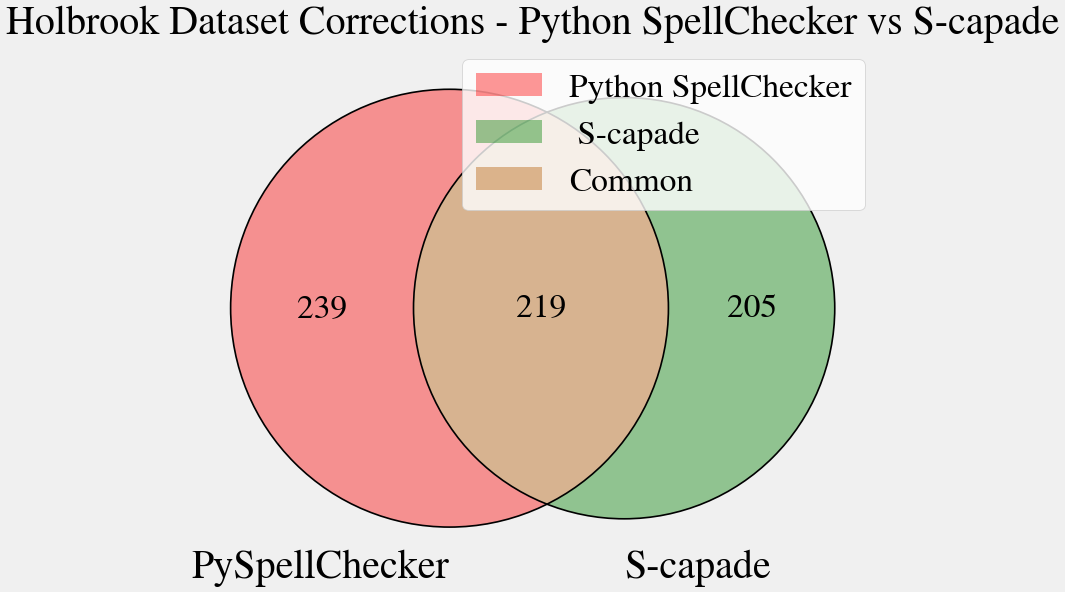

In [12]:

plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
v = venn2(subsets=(overlap_holbrook_py_scapade['pyspell'],overlap_holbrook_py_scapade['scapade'],
               overlap_holbrook_py_scapade['both']),set_labels=('PySpellChecker','S-capade'))
venn2_circles(subsets=(overlap_holbrook_py_scapade['pyspell'],overlap_holbrook_py_scapade['scapade'],
               overlap_holbrook_py_scapade['both']))

lbl_a = v.get_label_by_id("A")
lbl_b = v.get_label_by_id("B")
x1, y1 = lbl_a.get_position()
x2, y2 = lbl_b.get_position()
lbl_b.set_position((x2, y1))  
plt.legend(labels=['Python SpellChecker', ' S-capade','Common'])
plt.title('Holbrook Dataset Corrections - Python SpellChecker vs S-capade')
plt.show()

In [13]:
print(color.BOLD + "Holbrook Overlap PySpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_holbrook_py_scapade, 'PySpell')

Holbrook Overlap PySpell vs S-capade 

Total corrections: 663
Overlap corrections: 33.03%
Unique corrections PySpell: 36.05%
Unique corrections Phoneme method: 30.92%


## 2.3 Holbrook Overlap - SymSpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="holbrook_overlap_symspell_cmu"></a>

In [14]:
overlap_holbrook_sym_scapade = overlap(holbrook_symspell, holbrook_scapade, 'symspell', 'scapade', 
                                   'holbrook','symspell_vs_scapade')

In [15]:
overlap_holbrook_sym_scapade

{'both': 206, 'symspell': 223, 'scapade': 218}

#### Version 1 Results - No previous use of SymSpell

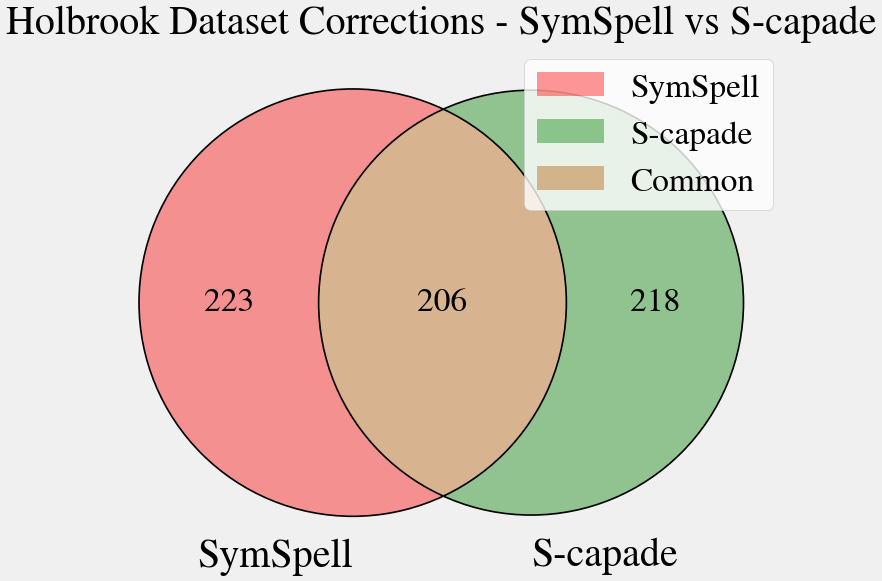

In [16]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_holbrook_sym_scapade['symspell'],overlap_holbrook_sym_scapade['scapade'],
               overlap_holbrook_sym_scapade['both']),set_labels=('SymSpell', 'S-capade','Common'))

venn2_circles(subsets=(overlap_holbrook_sym_scapade['symspell'],overlap_holbrook_sym_scapade['scapade'],
               overlap_holbrook_sym_scapade['both']))
plt.legend(labels=['SymSpell', 'S-capade','Common'])
plt.title('Holbrook Dataset Corrections - SymSpell vs S-capade')
plt.show()

In [17]:
print(color.BOLD + "Holbrook Overlap SymSpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_holbrook_sym_scapade, 'SymSpell')

Holbrook Overlap SymSpell vs S-capade 

Total corrections: 647
Overlap corrections: 31.84%
Unique corrections SymSpell: 34.47%
Unique corrections Phoneme method: 33.69%


## 2.4 Holbrook Overlap - Aspell vs S-capade (S-capade Correction with frequency dictionary)
<a name="holbrook_overlap_aspell_cmu"></a>

In [18]:
overlap_holbrook_asp_scapade = overlap(holbrook_aspell, holbrook_scapade, 'aspell', 'scapade', 
                                   'holbrook','aspell_vs_scapade')

In [19]:
overlap_holbrook_asp_scapade

{'both': 221, 'aspell': 202, 'scapade': 203}

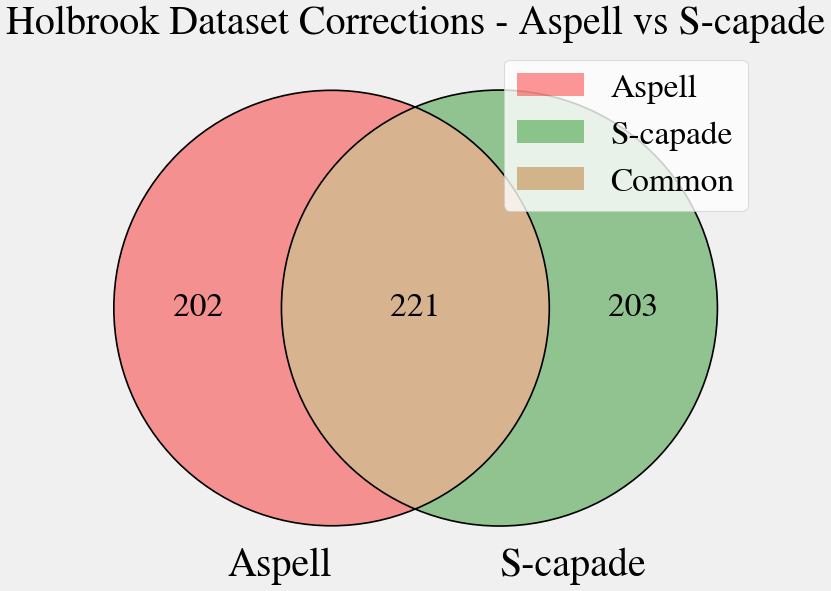

In [20]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
v = venn2(subsets=(overlap_holbrook_asp_scapade['aspell'],overlap_holbrook_asp_scapade['scapade'],
               overlap_holbrook_asp_scapade['both']),set_labels=('Aspell', 'S-capade','Common'))

venn2_circles(subsets=(overlap_holbrook_asp_scapade['aspell'],overlap_holbrook_asp_scapade['scapade'],
               overlap_holbrook_asp_scapade['both']))
lbl_a = v.get_label_by_id("A")
lbl_b = v.get_label_by_id("B")
x1, y1 = lbl_a.get_position()
x2, y2 = lbl_b.get_position()
lbl_b.set_position((x2, y1))  
plt.legend(labels=['Aspell', 'S-capade','Common'])
plt.title('Holbrook Dataset Corrections - Aspell vs S-capade')
plt.savefig('graphs/holbrook_overlap.png',)
plt.show()

In [21]:
print(color.BOLD + "Holbrook Overlap Aspell vs S-capade \n" + color.END)
print_overlap_scores(overlap_holbrook_asp_scapade, 'Aspell')

Holbrook Overlap Aspell vs S-capade 

Total corrections: 626
Overlap corrections: 35.30%
Unique corrections Aspell: 32.27%
Unique corrections Phoneme method: 32.43%


# 3.0 Birckbeck Dataset <a name="birkbeck"></a>

In [22]:
# Load Birkbeck Spelling dictionaries
file_name_b_pyspell = Path(input_path_files) / "birkbeck_pyspell_dict.txt"
birkbeck_pyspell = pickle.load(open(file_name_b_pyspell, "rb"))

file_name_b_symspell = Path(input_path_files) / "birkbeck_symspell_dict.txt"
birkbeck_symspell = pickle.load(open(file_name_b_symspell, "rb"))

file_name_b_aspell = Path(input_path_files) / "birkbeck_aspell_dict.txt"
birkbeck_aspell = pickle.load(open(file_name_b_aspell, "rb"))

file_name_b_scapade = Path(input_path_files) / "birkbeck_phonemes_sym.txt"
birkbeck_scapade = pickle.load(open(file_name_b_scapade, "rb"))

## 3.1 Birkbeck Scores <a name="birkbeck_scores"></a>

In [23]:
df_spellcheck_vs_scapade = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Candidates', 'Correct_and_Candidates'])
results_data = []
results_data.append(score_application('PySpell', birkbeck_pyspell))
results_data.append(score_application('SymSpell', birkbeck_symspell))
results_data.append(score_application('Aspell', birkbeck_aspell))
results_data.append(score_application('S-capade', birkbeck_scapade))
df_spellcheck_vs_scapade = df_spellcheck_vs_scapade.append(results_data)

In [24]:
df_spellcheck_vs_scapade

,Spelling Application,Correct,Candidates,Correct_and_Candidates
0,PySpell,11963,2474,14437
1,SymSpell,11773,2811,14584
2,Aspell,13519,8858,22377
3,S-capade,11666,5781,17447


In [25]:
birkbeck_total_words = len(birkbeck_pyspell)

In [26]:
scores = assign_scores(df_spellcheck_vs_scapade, 'birkbeck')
print_scores(scores, 'birkbeck', birkbeck_total_words)

PySpell Accuracy: 35.3%
SymSpell Accuracy: 34.74%
Aspell Accuracy: 39.89%
Phoneme Accuracy: 34.43%

PySpell Correct Answer in Candidates List: 7.3%
SymSpell Correct Answer in Candidates List: 8.3%
Aspell Correct Answer in Candidates List: 26.14%
Phoneme Correct Answer in Candidates List: 17.06%

PySpell Recall (Correct + Correct in Candidates List): 42.6%
SymSpell Recall (Correct + Correct in Candidates List): 43.04%
Aspell Recall (Correct + Correct in Candidates List): 66.03%
Phoneme Recall (Correct + Correct in Candidates List): 51.49%


## 3.2 Birkbeck Overlap - PySpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="birkbeck_overlap_pyspell"></a>

In [27]:
birkbeck_overlap_py_scapade = overlap(birkbeck_pyspell, birkbeck_scapade, 'pyspell', 'scapade',
                                  'birkbeck', 'pyspell_vs_scapade')

In [28]:
birkbeck_overlap_py_scapade

{'both': 7362, 'pyspell': 4601, 'scapade': 4304}

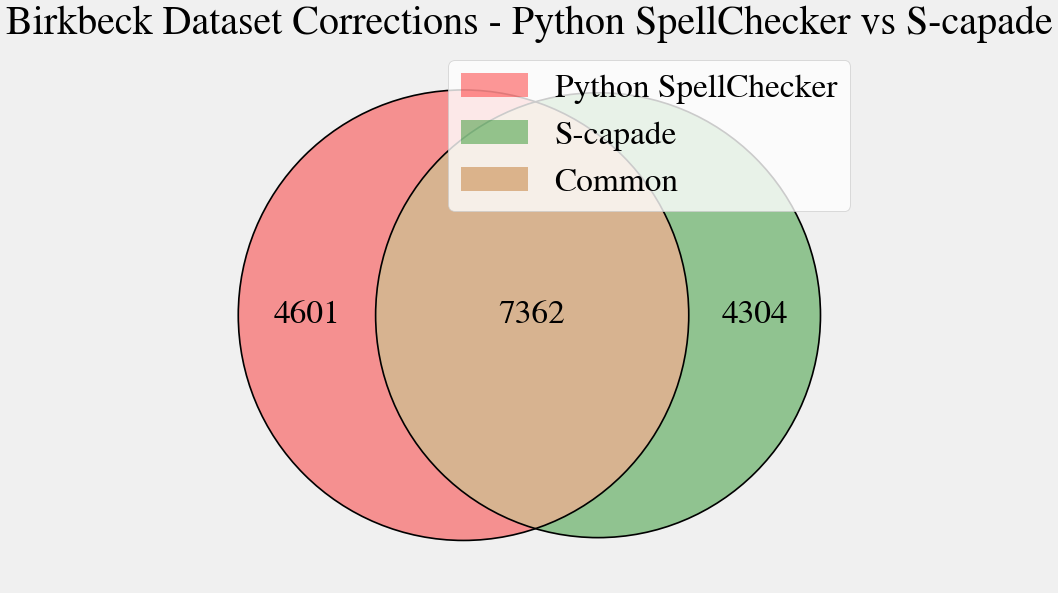

In [29]:
plt.figure(linewidth=5, facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(birkbeck_overlap_py_scapade['pyspell'],birkbeck_overlap_py_scapade['scapade'],
               birkbeck_overlap_py_scapade['both']), set_labels=('','',''))

venn2_circles(subsets=(birkbeck_overlap_py_scapade['pyspell'],birkbeck_overlap_py_scapade['scapade'],
               birkbeck_overlap_py_scapade['both']))

plt.legend(labels=['Python SpellChecker', 'S-capade','Common'])
plt.title('Birkbeck Dataset Corrections - Python SpellChecker vs S-capade')
plt.show()

In [30]:
print(color.BOLD + "Birkbeck Overlap PySpell vs S-capade \n" + color.END)
print_overlap_scores(birkbeck_overlap_py_scapade, 'PySpell')

Birkbeck Overlap PySpell vs S-capade 

Total corrections: 16267
Overlap corrections: 45.26%
Unique corrections PySpell: 28.28%
Unique corrections Phoneme method: 26.46%


## 3.3 Birkbeck Overlap - SymSpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="birkbeck_overlap_symspell"></a>

In [31]:
overlap_birkbeck_sym_scapade = overlap(birkbeck_symspell, birkbeck_scapade, 'symspell', 'scapade', 
                               'birkbeck', 'symspell_vs_scapade')

In [32]:
overlap_birkbeck_sym_scapade

{'both': 7283, 'symspell': 4490, 'scapade': 4383}

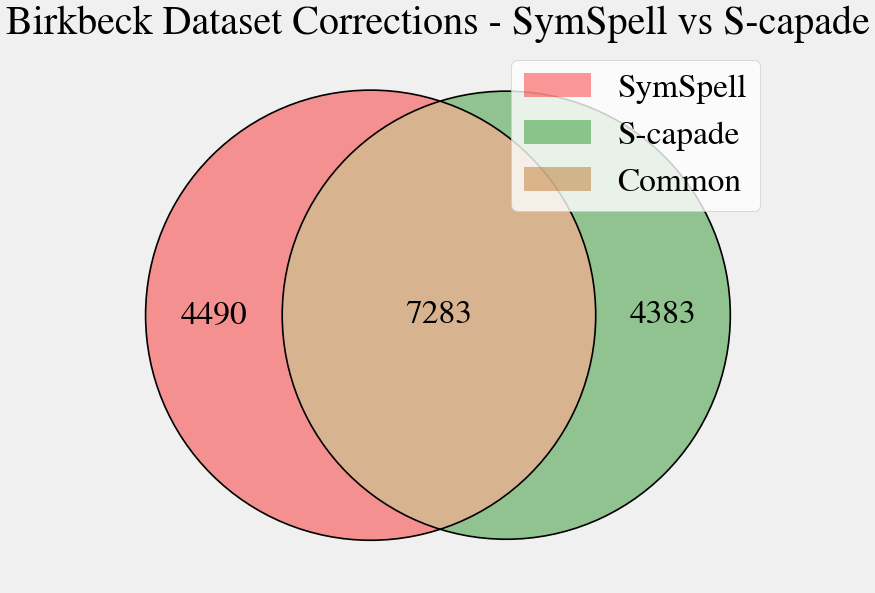

In [33]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_birkbeck_sym_scapade['symspell'],overlap_birkbeck_sym_scapade['scapade'],
               overlap_birkbeck_sym_scapade['both']), set_labels=('','',''))

venn2_circles(subsets=(overlap_birkbeck_sym_scapade['symspell'],overlap_birkbeck_sym_scapade['scapade'],
               overlap_birkbeck_sym_scapade['both']))

plt.legend(labels=['SymSpell', 'S-capade','Common'])
plt.title('Birkbeck Dataset Corrections - SymSpell vs S-capade')
plt.show()

In [34]:
print(color.BOLD + "Birkbeck Overlap SymSpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_birkbeck_sym_scapade, 'SymSpell')

Birkbeck Overlap SymSpell vs S-capade 

Total corrections: 16156
Overlap corrections: 45.08%
Unique corrections SymSpell: 27.79%
Unique corrections Phoneme method: 27.13%


## 3.4 Birkbeck Overlap - Aspell vs S-capade (S-capade Correction with frequency dictionary)
<a name="birkbeck_overlap_aspell"></a>

In [35]:
overlap_birkbeck_as_scapade = overlap(birkbeck_aspell, birkbeck_scapade, 'aspell', 'scapade', 
                               'birkbeck', 'aspell_vs_scapade')

In [36]:
overlap_birkbeck_as_scapade

{'both': 8156, 'aspell': 5363, 'scapade': 3510}

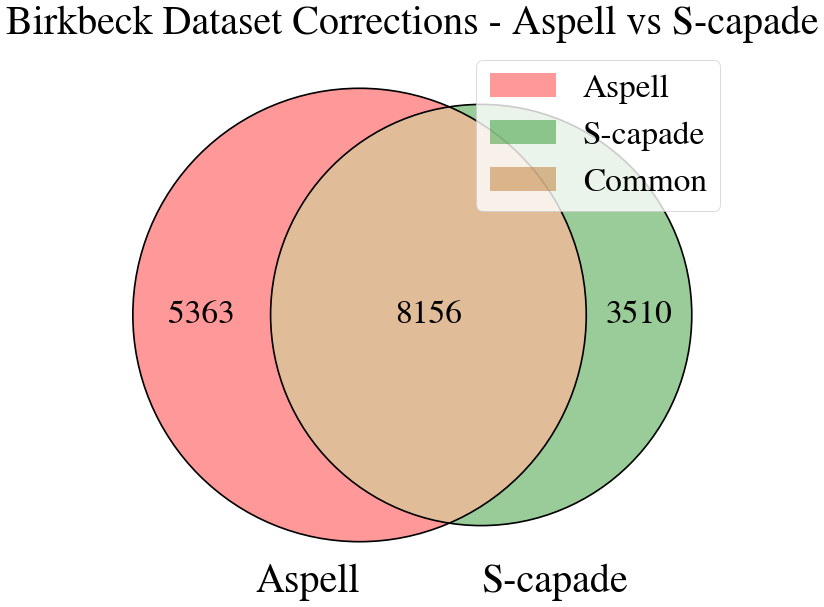

In [37]:
plt.figure(linewidth=5,  facecolor='#FFFFFF', figsize=(15,12), dpi=60)
v = venn2(subsets=(overlap_birkbeck_as_scapade['aspell'],overlap_birkbeck_as_scapade['scapade'],
               overlap_birkbeck_as_scapade['both']), set_labels=('Aspell', 'S-capade','Common'))

venn2_circles(subsets=(overlap_birkbeck_as_scapade['aspell'],overlap_birkbeck_as_scapade['scapade'],
               overlap_birkbeck_as_scapade['both']))

lbl_a = v.get_label_by_id("A")
lbl_b = v.get_label_by_id("B")
x1, y1 = lbl_a.get_position()
x2, y2 = lbl_b.get_position()
lbl_b.set_position((x2, y1))  
plt.legend(labels=['Aspell', 'S-capade','Common'])
plt.title('Birkbeck Dataset Corrections - Aspell vs S-capade')
plt.savefig('graphs/birkbeck_overlap.png')
plt.show()

In [38]:
print(color.BOLD + "Birkbeck Overlap Aspell vs S-capade \n" + color.END)
print_overlap_scores(overlap_birkbeck_as_scapade, 'Aspell')

Birkbeck Overlap Aspell vs S-capade 

Total corrections: 17029
Overlap corrections: 47.89%
Unique corrections Aspell: 31.49%
Unique corrections Phoneme method: 20.61%


# 4.0 Zeeko Dataset <a name="zeeko"></a>

In [5]:
# Load Zeeko Spelling dictionaries
file_name_z_pyspell = Path(input_path_files) / "zeeko_pyspell_dict.txt"
zeeko_pyspell = pickle.load(open(file_name_z_pyspell, "rb"))

file_name_z_symspell = Path(input_path_files) / "zeeko_symspell_dict.txt"
zeeko_symspell = pickle.load(open(file_name_z_symspell, "rb"))

file_name_z_aspell = Path(input_path_files) / "zeeko_aspell_dict.txt"
zeeko_aspell = pickle.load(open(file_name_z_aspell, "rb"))

file_name_z_scapade = Path(input_path_files) / "zeeko_phonemes_sym.txt"
zeeko_scapade = pickle.load(open(file_name_z_scapade, "rb"))

## 4.1 Zeeko Scores <a name="zeeko_scores"></a>

In [6]:
df_spellcheck_vs_scapade = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Candidates', 'Correct_and_Candidates'])
results_data = []
results_data.append(score_application('PySpell', zeeko_pyspell))
results_data.append(score_application('SymSpell', zeeko_symspell))
results_data.append(score_application('Aspell', zeeko_aspell))
results_data.append(score_application('S-capade', zeeko_scapade))
df_spellcheck_vs_scapade = df_spellcheck_vs_scapade.append(results_data)

In [7]:
df_spellcheck_vs_scapade

,Spelling Application,Correct,Candidates,Correct_and_Candidates
0,PySpell,132,36,168
1,SymSpell,127,37,164
2,Aspell,127,74,201
3,S-capade,115,62,177


In [8]:
zeeko_total_words = len(zeeko_symspell)

In [9]:
score_application('S-capade', zeeko_scapade)

{'Spelling Application': 'S-capade',
 'Correct': 115,
 'Candidates': 62,
 'Correct_and_Candidates': 177}

## 4.2 Zeeko Overlap - PySpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="zeeko_overlap_pyspell"></a>

In [10]:
overlap_zeeko_py_scapade = overlap(zeeko_pyspell, zeeko_scapade, 'pyspell', 'scapade', 'zeeko', 
                           'pyspell_vs_scapade')

In [11]:
overlap_zeeko_py_scapade

{'both': 77, 'pyspell': 55, 'scapade': 38}

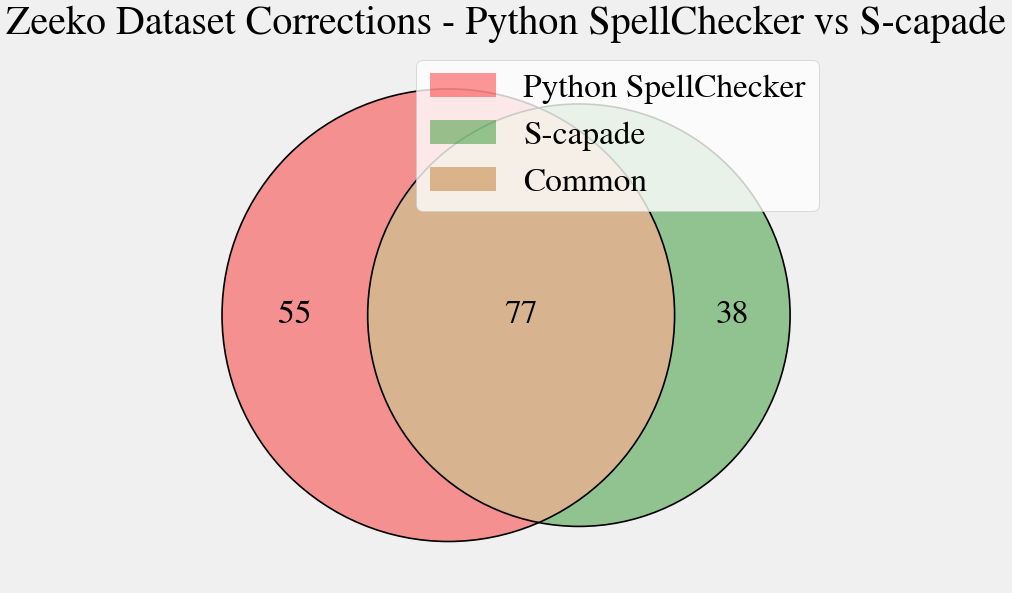

In [12]:
plt.figure(linewidth=5, facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_zeeko_py_scapade['pyspell'],overlap_zeeko_py_scapade['scapade'],overlap_zeeko_py_scapade['both']), 
      set_labels=('','',''))

venn2_circles(subsets=(overlap_zeeko_py_scapade['pyspell'],overlap_zeeko_py_scapade['scapade'],
                       overlap_zeeko_py_scapade['both']))

plt.legend(labels=['Python SpellChecker', 'S-capade','Common'])
plt.title('Zeeko Dataset Corrections - Python SpellChecker vs S-capade')
plt.show()

In [13]:
print(color.BOLD + "Zeeko Overlap PySpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_zeeko_py_scapade, 'PySpell')

Zeeko Overlap PySpell vs S-capade 

Total corrections: 170
Overlap corrections: 45.29%
Unique corrections PySpell: 32.35%
Unique corrections Phoneme method: 22.35%


## 4.3 Zeeko Overlap - SymSpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="zeeko_overlap_symspell"></a>

In [14]:
overlap_zeeko_sym_scapade = overlap(zeeko_symspell, zeeko_scapade, 'symspell', 'scapade', 'zeeko',
                            'symspell_vs_scapade')

In [15]:
overlap_zeeko_sym_scapade

{'both': 78, 'symspell': 49, 'scapade': 37}

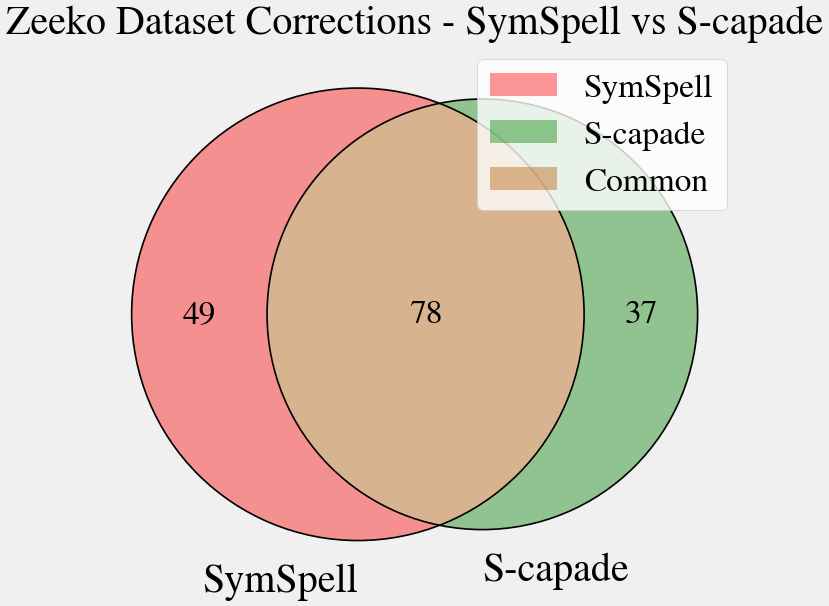

In [16]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_zeeko_sym_scapade['symspell'],overlap_zeeko_sym_scapade['scapade'],
               overlap_zeeko_sym_scapade['both']), 
      set_labels=('SymSpell', 'S-capade','Common'))

venn2_circles(subsets=(overlap_zeeko_sym_scapade['symspell'],overlap_zeeko_sym_scapade['scapade'],
                       overlap_zeeko_sym_scapade['both']))
plt.legend(labels=['SymSpell', 'S-capade','Common'])
plt.title('Zeeko Dataset Corrections - SymSpell vs S-capade')
plt.show()

In [17]:
print(color.BOLD + "Zeeko Overlap SymSpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_zeeko_sym_scapade, 'SymSpell')

Zeeko Overlap SymSpell vs S-capade 

Total corrections: 164
Overlap corrections: 47.56%
Unique corrections SymSpell: 29.88%
Unique corrections Phoneme method: 22.56%


## 4.4 Zeeko Overlap - Aspell vs S-capade (S-capade Correction with frequency dictionary)
<a name="zeeko_overlap_aspell"></a>

In [18]:
overlap_zeeko_asp_scapade = overlap(zeeko_aspell, zeeko_scapade, 'aspell', 'scapade', 'zeeko',
                            'aspell_vs_scapade')

In [19]:
overlap_zeeko_asp_scapade

{'both': 78, 'aspell': 49, 'scapade': 37}

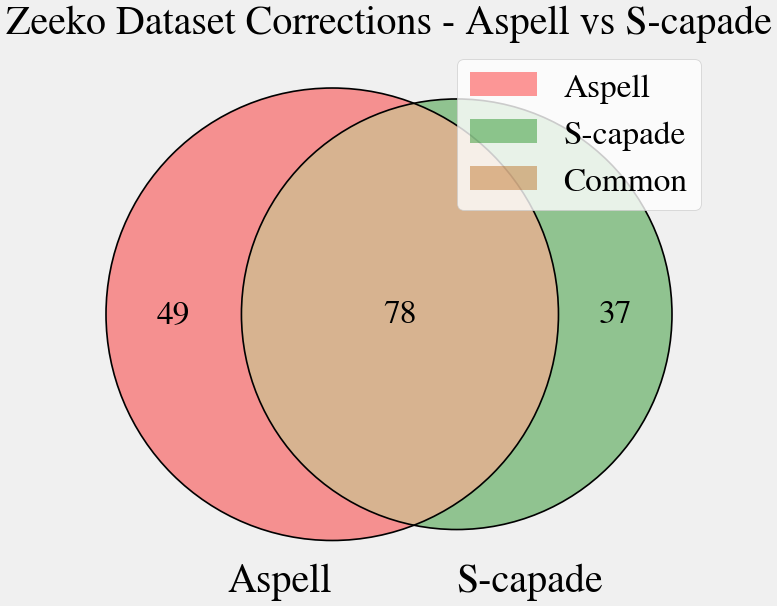

In [20]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
v = venn2(subsets=(overlap_zeeko_asp_scapade['aspell'],overlap_zeeko_asp_scapade['scapade'],
                   overlap_zeeko_asp_scapade['both']), 
      set_labels=('Aspell', 'S-capade','Common'))

venn2_circles(subsets=(overlap_zeeko_asp_scapade['aspell'],overlap_zeeko_asp_scapade['scapade'],
                       overlap_zeeko_asp_scapade['both']))

lbl_a = v.get_label_by_id("A")
lbl_b = v.get_label_by_id("B")
x1, y1 = lbl_a.get_position()
x2, y2 = lbl_b.get_position()
lbl_b.set_position((x2, y1))  
plt.legend(labels=['Aspell', 'S-capade','Common'])
plt.title('Zeeko Dataset Corrections - Aspell vs S-capade')
plt.savefig('graphs/zeeko_overlap.png')
plt.show()

In [21]:
print(color.BOLD + "Zeeko Overlap Aspell vs S-capade \n" + color.END)
print_overlap_scores(overlap_zeeko_asp_scapade, 'Aspell')

Zeeko Overlap Aspell vs S-capade 

Total corrections: 164
Overlap corrections: 47.56%
Unique corrections Aspell: 29.88%
Unique corrections Phoneme method: 22.56%


# 5.0 Aspell Dataset <a name="aspell"></a>

In [22]:
# Load aspell Spelling dictionaries
file_name_a_pyspell = Path(input_path_files) / "aspell_pyspell_dict.txt"
aspell_pyspell = pickle.load(open(file_name_a_pyspell, "rb"))

file_name_a_symspell = Path(input_path_files) / "aspell_symspell_dict.txt"
aspell_symspell = pickle.load(open(file_name_a_symspell, "rb"))

file_name_a_aspell = Path(input_path_files) / "aspell_aspell_dict.txt"
aspell_aspell = pickle.load(open(file_name_a_aspell, "rb"))

file_name_a_scapade = Path(input_path_files) / "aspell_phonemes_sym.txt"
aspell_scapade = pickle.load(open(file_name_a_scapade, "rb"))

## 5.1 Aspell Scores <a name="aspell_scores"></a>

In [57]:
df_spellcheck_vs_scapade = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Candidates', 
                                                 'Correct_and_Candidates'])
results_data = []
results_data.append(score_application('PySpell', aspell_pyspell))
results_data.append(score_application('SymSpell', aspell_symspell))
results_data.append(score_application('Aspell', aspell_aspell))
results_data.append(score_application('S-capade', aspell_scapade))
df_spellcheck_vs_scapade = df_spellcheck_vs_scapade.append(results_data)

In [58]:
df_spellcheck_vs_scapade

,Spelling Application,Correct,Candidates,Correct_and_Candidates
0,PySpell,254,67,321
1,SymSpell,274,72,346
2,Aspell,287,159,446
3,S-capade,239,97,336


In [59]:
aspell_total_words = len(aspell_scapade)

In [60]:
scores = assign_scores(df_spellcheck_vs_scapade, 'aspell')
print_scores(scores, 'aspell', aspell_total_words)

PySpell Accuracy: 49.32%
SymSpell Accuracy: 53.2%
Aspell Accuracy: 55.73%
Phoneme Accuracy: 46.41%

PySpell Correct Answer in Candidates List: 13.01%
SymSpell Correct Answer in Candidates List: 13.98%
Aspell Correct Answer in Candidates List: 30.87%
Phoneme Correct Answer in Candidates List: 18.83%

PySpell Recall (Correct + Correct in Candidates List): 62.33%
SymSpell Recall (Correct + Correct in Candidates List): 67.18%
Aspell Recall (Correct + Correct in Candidates List): 86.6%
Phoneme Recall (Correct + Correct in Candidates List): 65.24%


## 5.2 Aspell Overlap - PySpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="aspell_overlap_pyspell_cmu"></a>

In [61]:
overlap_aspell_py_scapade = overlap(aspell_pyspell, aspell_scapade, 'pyspell', 'scapade', 'aspell',
                            'pyspell_vs_scapade')

In [62]:
overlap_aspell_py_scapade

{'both': 154, 'pyspell': 100, 'scapade': 85}

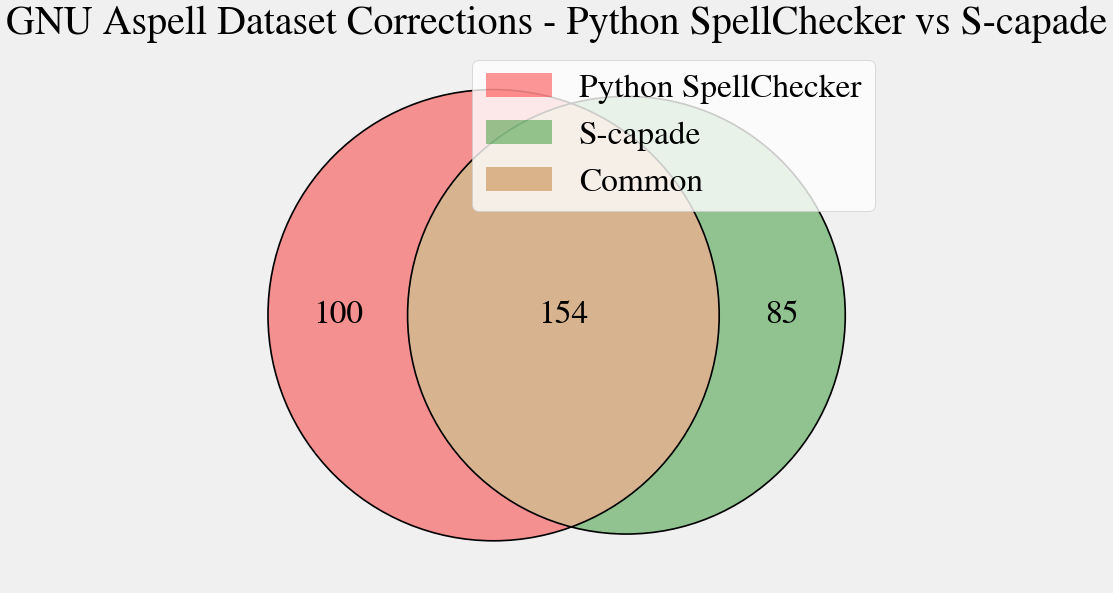

In [63]:
plt.figure(linewidth=5, facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_aspell_py_scapade['pyspell'],overlap_aspell_py_scapade['scapade'],
               overlap_aspell_py_scapade['both']), set_labels=('','',''))

venn2_circles(subsets=(overlap_aspell_py_scapade['pyspell'],overlap_aspell_py_scapade['scapade'],
               overlap_aspell_py_scapade['both']))

plt.legend(labels=['Python SpellChecker', 'S-capade','Common'])
plt.title('GNU Aspell Dataset Corrections - Python SpellChecker vs S-capade')
plt.show()

In [64]:
print(color.BOLD + "Aspell Overlap PySpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_aspell_py_scapade, 'PySpell')

Aspell Overlap PySpell vs S-capade 

Total corrections: 339
Overlap corrections: 45.43%
Unique corrections PySpell: 29.50%
Unique corrections Phoneme method: 25.07%


## 5.3 Aspell Overlap - SymSpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="aspell_overlap_symspell_cmu"></a>

In [65]:
overlap_aspell_sym_scapade = overlap(aspell_symspell, aspell_scapade, 'symspell', 'scapade', 'aspell', 
                             'symspell_vs_scapade')

In [66]:
overlap_aspell_sym_scapade

{'both': 168, 'symspell': 106, 'scapade': 71}

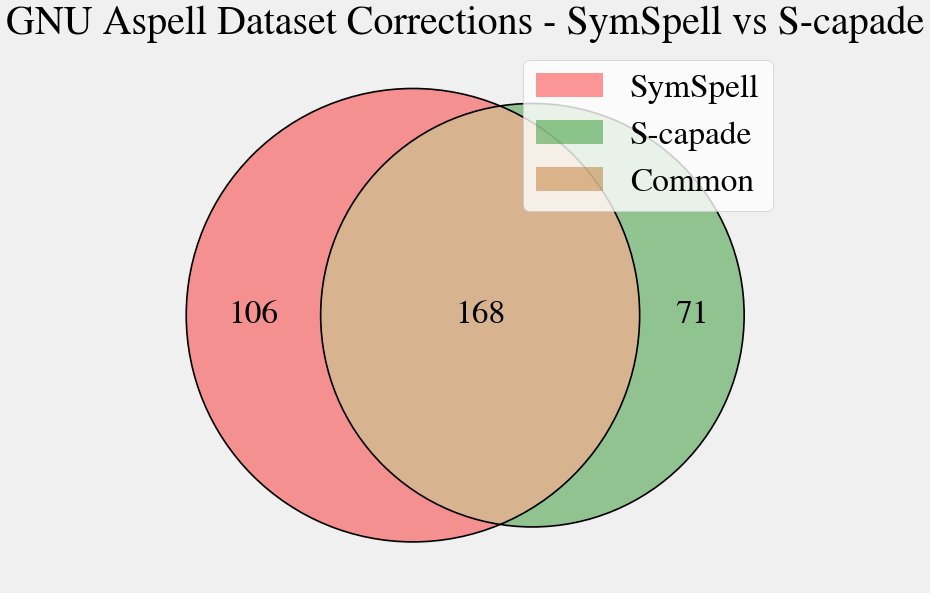

In [67]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_aspell_sym_scapade['symspell'],overlap_aspell_sym_scapade['scapade'],
               overlap_aspell_sym_scapade['both']),
      set_labels=('','',''))

venn2_circles(subsets=(overlap_aspell_sym_scapade['symspell'],overlap_aspell_sym_scapade['scapade'],
                       overlap_aspell_sym_scapade['both']))

plt.legend(labels=['SymSpell', 'S-capade','Common'])
plt.title('GNU Aspell Dataset Corrections - SymSpell vs S-capade')
plt.show()

In [68]:
print(color.BOLD + "Aspell Overlap SymSpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_aspell_sym_scapade, 'SymSpell')

Aspell Overlap SymSpell vs S-capade 

Total corrections: 345
Overlap corrections: 48.70%
Unique corrections SymSpell: 30.72%
Unique corrections Phoneme method: 20.58%


## 5.4 Aspell Overlap - Aspell vs S-capade (S-capade Correction with frequency dictionary)
<a name="aspell_overlap_aspell_cmu"></a>

In [69]:
overlap_aspell_asp_scapade = overlap(aspell_aspell, aspell_scapade, 'aspell', 'scapade', 'aspell', 
                             'aspell_vs_scapade')

In [70]:
overlap_aspell_asp_scapade

{'both': 175, 'aspell': 112, 'scapade': 64}

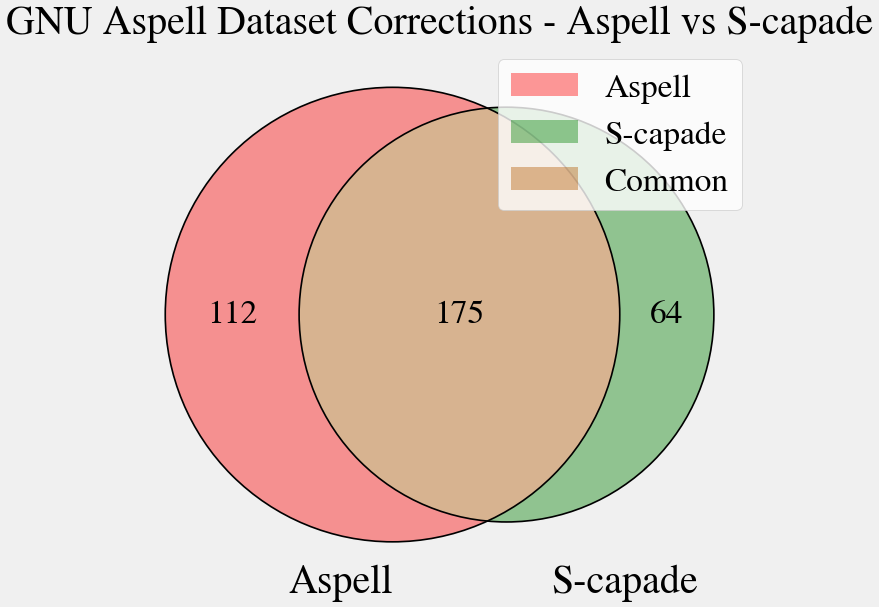

In [71]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
v = venn2(subsets=(overlap_aspell_asp_scapade['aspell'],overlap_aspell_asp_scapade['scapade'],
                   overlap_aspell_asp_scapade['both']),
      set_labels=('Aspell', 'S-capade','Common'))

lbl_a = v.get_label_by_id("A")
lbl_b = v.get_label_by_id("B")
x1, y1 = lbl_a.get_position()
x2, y2 = lbl_b.get_position()
lbl_b.set_position((x2+0.1, y1))  
venn2_circles(subsets=(overlap_aspell_asp_scapade['aspell'],overlap_aspell_asp_scapade['scapade'],
                       overlap_aspell_asp_scapade['both']))

plt.legend(labels=['Aspell', 'S-capade','Common'])
plt.title('GNU Aspell Dataset Corrections - Aspell vs S-capade')
plt.savefig('graphs/aspell_overlap.png')
plt.show()

In [72]:
print(color.BOLD + "Aspell Overlap Aspell vs S-capade \n" + color.END)
print_overlap_scores(overlap_aspell_asp_scapade, 'Aspell')

Aspell Overlap Aspell vs S-capade 

Total corrections: 351
Overlap corrections: 49.86%
Unique corrections Aspell: 31.91%
Unique corrections Phoneme method: 18.23%


# 6.0 Wikipedia Dataset <a name="wiki"><a/>

In [73]:
# Load wiki Spelling dictionaries
file_name_w_pyspell = Path(input_path_files) / "wiki_pyspell_dict.txt"
wiki_pyspell = pickle.load(open(file_name_w_pyspell, "rb"))

file_name_w_symspell = Path(input_path_files) / "wiki_symspell_dict.txt"
wiki_symspell = pickle.load(open(file_name_w_symspell, "rb"))

file_name_w_aspell = Path(input_path_files) / "wiki_aspell_dict.txt"
wiki_aspell = pickle.load(open(file_name_w_aspell, "rb"))

file_name_w_scapade = Path(input_path_files) / "wiki_phonemes_sym.txt"
wiki_scapade = pickle.load(open(file_name_w_scapade, "rb"))

## 6.1 Wikipedia Scores <a name="wiki_scores"></a>

In [74]:
df_spellcheck_vs_scapade = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Candidates', 'Correct_and_Candidates'])
results_data = []
results_data.append(score_application('PySpell', wiki_pyspell))
results_data.append(score_application('SymSpell', wiki_symspell))
results_data.append(score_application('Aspell', wiki_aspell))
results_data.append(score_application('S-capade', wiki_scapade))
df_spellcheck_vs_scapade = df_spellcheck_vs_scapade.append(results_data)

In [75]:
df_spellcheck_vs_scapade

,Spelling Application,Correct,Candidates,Correct_and_Candidates
0,PySpell,1748,225,1973
1,SymSpell,1806,248,2054
2,Aspell,1783,381,2164
3,S-capade,1408,327,1735


In [76]:
wiki_total_words = len(wiki_scapade)

In [77]:
scores = assign_scores(df_spellcheck_vs_scapade, 'wiki')
print_scores(scores, 'wiki', wiki_total_words)

PySpell Accuracy: 78.39%
SymSpell Accuracy: 80.99%
Aspell Accuracy: 79.96%
Phoneme Accuracy: 63.14%

PySpell Correct Answer in Candidates List: 10.09%
SymSpell Correct Answer in Candidates List: 11.12%
Aspell Correct Answer in Candidates List: 17.09%
Phoneme Correct Answer in Candidates List: 14.66%

PySpell Recall (Correct + Correct in Candidates List): 88.48%
SymSpell Recall (Correct + Correct in Candidates List): 92.11%
Aspell Recall (Correct + Correct in Candidates List): 97.04%
Phoneme Recall (Correct + Correct in Candidates List): 77.8%


## 6.2 Wikipedia Overlap - PySpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="wiki_overlap_pyspell"></a>

In [78]:
overlap_wiki_py_scapade = overlap(wiki_pyspell, wiki_scapade, 'pyspell', 'scapade', 'wiki', 
                          'pyspell_vs_scapade')

In [79]:
overlap_wiki_py_scapade

{'both': 1179, 'pyspell': 569, 'scapade': 229}

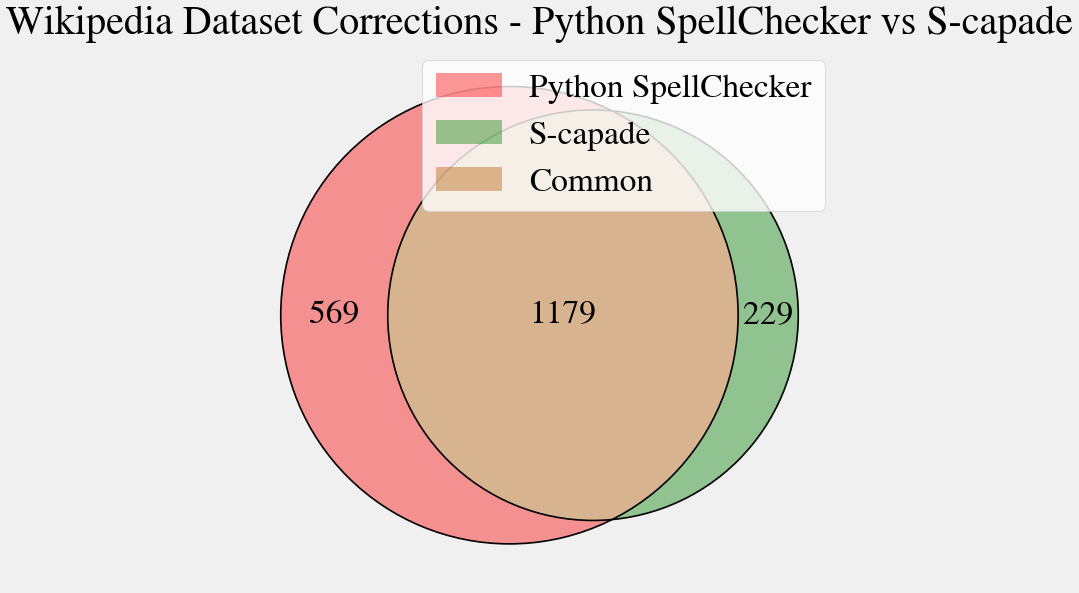

In [80]:
plt.figure(linewidth=5, facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_wiki_py_scapade['pyspell'],overlap_wiki_py_scapade['scapade'],
               overlap_wiki_py_scapade['both']), set_labels=('','',''))

venn2_circles(subsets=(overlap_wiki_py_scapade['pyspell'],overlap_wiki_py_scapade['scapade'],
                       overlap_wiki_py_scapade['both']))
plt.legend(labels=['Python SpellChecker', 'S-capade','Common'])
plt.title('Wikipedia Dataset Corrections - Python SpellChecker vs S-capade')
plt.show()

In [81]:
print(color.BOLD + "Wikipedia Overlap PySpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_wiki_py_scapade, 'PySpell')

Wikipedia Overlap PySpell vs S-capade 

Total corrections: 1977
Overlap corrections: 59.64%
Unique corrections PySpell: 28.78%
Unique corrections Phoneme method: 11.58%


## 6.3 Wikipedia Overlap - SymSpell vs S-capade (S-capade Correction with frequency dictionary)
<a name="wiki_overlap_symspell"></a>

In [82]:
overlap_wiki_sym_scapade = overlap(wiki_symspell, wiki_scapade, 'symspell', 'scapade', 'wiki', 
                           'symspell_vs_scapade')

In [83]:
overlap_wiki_sym_scapade

{'both': 1215, 'symspell': 591, 'scapade': 193}

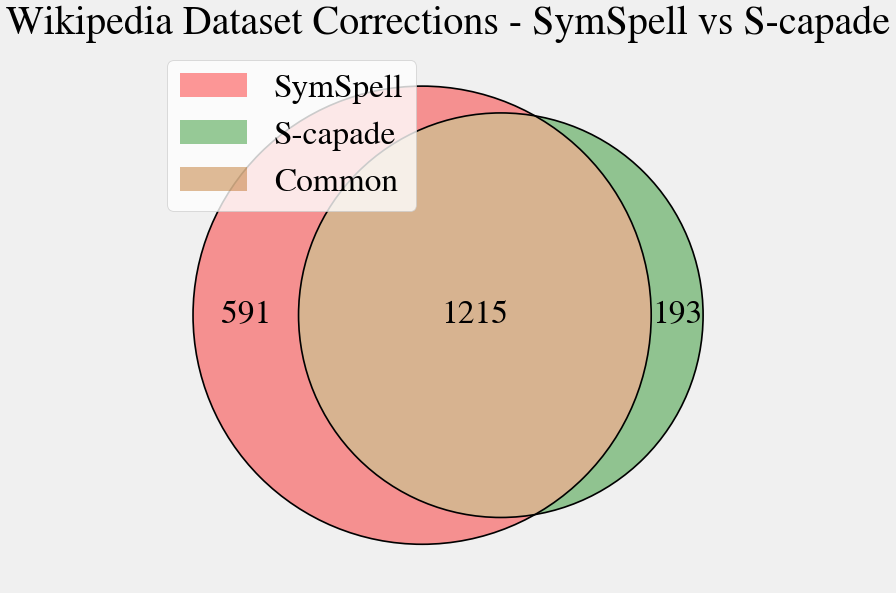

In [84]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
venn2(subsets=(overlap_wiki_sym_scapade['symspell'],overlap_wiki_sym_scapade['scapade'],
               overlap_wiki_sym_scapade['both']), 
      set_labels=('','',''))

venn2_circles(subsets=(overlap_wiki_sym_scapade['symspell'],overlap_wiki_sym_scapade['scapade'],
                       overlap_wiki_sym_scapade['both']))

plt.legend(labels=['SymSpell', 'S-capade','Common'])
plt.title('Wikipedia Dataset Corrections - SymSpell vs S-capade')
plt.show()

In [85]:
print(color.BOLD + "Aspell Overlap SymSpell vs S-capade \n" + color.END)
print_overlap_scores(overlap_wiki_sym_scapade, 'SymSpell')

Aspell Overlap SymSpell vs S-capade 

Total corrections: 1999
Overlap corrections: 60.78%
Unique corrections SymSpell: 29.56%
Unique corrections Phoneme method: 9.65%


## 6.4 Wikipedia Overlap - Aspell vs S-capade (S-capade Correction with frequency dictionary)
<a name="wiki_overlap_aspell"></a>

In [86]:
overlap_wiki_asp_scapade = overlap(wiki_aspell, wiki_scapade, 'aspell', 'scapade', 'wiki', 
                           'aspell_vs_scapade')

In [87]:
overlap_wiki_asp_scapade

{'both': 1207, 'aspell': 576, 'scapade': 201}

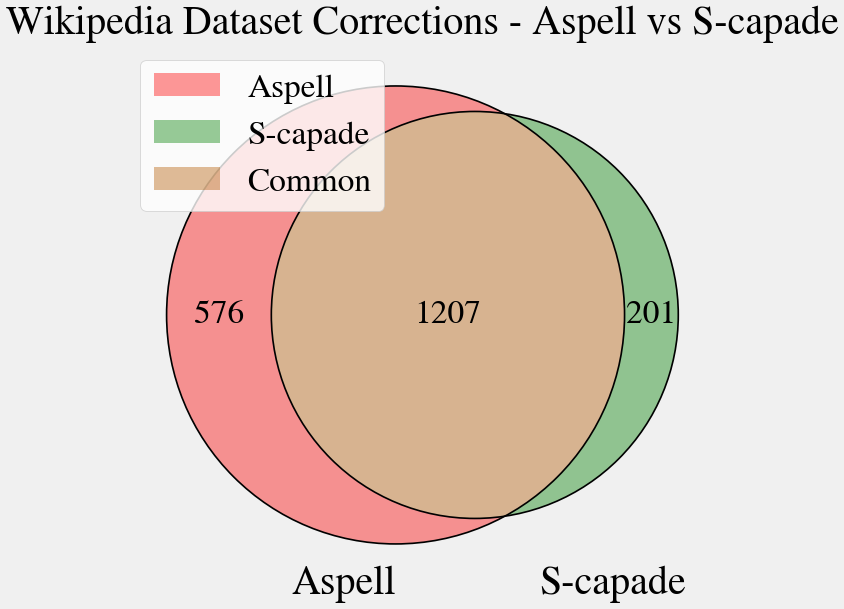

In [88]:
plt.figure(linewidth=5,  facecolor='#F0F0F0', figsize=(15,12), dpi=60)
v = venn2(subsets=(overlap_wiki_asp_scapade['aspell'],overlap_wiki_asp_scapade['scapade'],
                   overlap_wiki_asp_scapade['both']), 
      set_labels=('Aspell', 'S-capade','Common'))

venn2_circles(subsets=(overlap_wiki_asp_scapade['aspell'],overlap_wiki_asp_scapade['scapade'],
                       overlap_wiki_asp_scapade['both']))

lbl_a = v.get_label_by_id("A")
lbl_b = v.get_label_by_id("B")
x1, y1 = lbl_a.get_position()
x2, y2 = lbl_b.get_position()
lbl_b.set_position((x2+0.15, y1))  
plt.legend(labels=['Aspell', 'S-capade','Common'])
plt.title('Wikipedia Dataset Corrections - Aspell vs S-capade')
plt.savefig('graphs/wiki_overlap')
plt.show()

In [89]:
print(color.BOLD + "Aspell Overlap Aspell vs S-capade \n" + color.END)
print_overlap_scores(overlap_wiki_asp_scapade, 'Aspell')

Aspell Overlap Aspell vs S-capade 

Total corrections: 1984
Overlap corrections: 60.84%
Unique corrections Aspell: 29.03%
Unique corrections Phoneme method: 10.13%


### Compute the csv file for S-capade showing all attempts for each dataset

In [90]:
# see helper_results.py
# scapade_all_attempts()

# 7.0 Corrections Made - Direct Dictionary Lookup vs Acoustic Distance
<a name="direct_vs_distance"></a>

In [91]:
# path to each scapade_all_attempts.csv file for all datasets
aspell_path = "results/aspell/scapade_all_attempts.csv"
birkbeck_path = "results/birkbeck/scapade_all_attempts.csv"
holbrook_path = "results/holbrook/scapade_all_attempts.csv"
wiki_path = "results/wiki/scapade_all_attempts.csv"
zeeko_path ="results/zeeko/scapade_all_attempts.csv"

In [92]:
# load each file in as a dataframe
df_aspell = pd.read_csv(aspell_path)
df_birkbeck = pd.read_csv(birkbeck_path)
df_holbrook = pd.read_csv(holbrook_path)
df_wiki = pd.read_csv(wiki_path)
df_zeeko = pd.read_csv(zeeko_path)

## 7.1 Holbrook Dataset - S-capade Lookups vs  Acoustic Distance
<a name="direct_vs_distance_holbrook"></a>

In [93]:
df_holbrook['exact_match'] = np.where(df_holbrook['phoneme_rep']==df_holbrook['suggested_phoneme'],1,0)
df_holbrook_filtered = df_holbrook[(df_holbrook['in_candidates'] == 1) | (df_holbrook['correct'])]
print("Total exact match lookup:",sum(df_holbrook_filtered['exact_match']))

Total exact match lookup: 509


## 7.2 Birkbeck Dataset - S-capade Lookups vs  Acoustic Distance
<a name="direct_vs_distance_birkbeck"></a>

In [94]:
df_birkbeck['exact_match'] = np.where(df_birkbeck['phoneme_rep']==df_birkbeck['suggested_phoneme'],1,0)
df_birkbeck_filtered = df_birkbeck[(df_birkbeck['in_candidates'] == 1) | (df_birkbeck['correct'] == 1)]
print("Total exact match lookup:",sum(df_birkbeck_filtered['exact_match']))

Total exact match lookup: 6779


## 7.3 Zeeko Dataset - S-capade Lookups vs  Acoustic Distance
<a name="direct_vs_distance_zeeko"></a>

In [95]:
df_zeeko['exact_match'] = np.where(df_zeeko['phoneme_rep']==df_zeeko['suggested_phoneme'],1,0)
df_zeeko_filtered = df_zeeko[(df_zeeko['in_candidates'] == 1) | (df_zeeko['correct'] == 1)]
print("Total exact match lookup:",sum(df_zeeko_filtered['exact_match']))

Total exact match lookup: 80


## 7.4 Aspell Dataset - S-capade Lookups vs  Acoustic Distance
<a name="direct_vs_distance_aspell"></a>

In [96]:
df_aspell['exact_match'] = np.where(df_aspell['phoneme_rep']==df_aspell['suggested_phoneme'],1,0)
df_aspell_filtered = df_aspell[(df_aspell['in_candidates'] == 1) | (df_aspell['correct'] == 1)]
print("Total exact match lookup:",sum(df_aspell_filtered['exact_match']))

Total exact match lookup: 155


## 7.5 Wikipedia Dataset - S-capade Lookups vs  Acoustic Distance
<a name="direct_vs_distance_wiki"></a>

In [97]:
df_wiki['exact_match'] = np.where(df_wiki['phoneme_rep']==df_wiki['suggested_phoneme'],1,0)
df_wiki_filtered = df_wiki[(df_wiki['in_candidates'] == 1) | (df_wiki['correct'] == 1)]
print("Total exact match lookup:",sum(df_wiki_filtered['exact_match']))

Total exact match lookup: 848


# 8.0 Edit Distance Greater Than 2 - Interesting Word Corrections
<a name="interesting"></a>

In [98]:
def edit(misspelling, correct):
    return editdistance.eval(str(misspelling), str(correct))

## 8.1 Holbrook Dataset: S-capade Corrections Greater than 2 Character Edit Distance
<a name="interesting_holbrook"></a>

In [99]:
df_holbrook['edit_distance'] = df_holbrook.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)
df_holbrook_edit = df_holbrook[(df_holbrook['edit_distance'] > 2) & (df_holbrook['exact_match'] == 0) 
                               & (df_holbrook['in_candidates'] == 1)]
df_holbrook_edit = df_holbrook_edit.sort_values(by=['edit_distance'], ascending=False)
df_holbrook_edit.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
751,1.0,1.0,hydraulic,high_drollit,HH AY D R AO L IH T,hydraulic,HH AY D R AO L IH K,"['hydraulic', 'hydraulics']",0,7
529,1.0,1.0,enough,a_nuff,AE N AH F,enough,IH N AH F,"['enough', 'enough', 'anise', 'anas', 'snuff',...",0,5
1560,0.0,1.0,yourself,your_sleve,Y AO R S L IY V,horsely,HH AO R S L IY,['yourself'],0,4
397,0.0,1.0,company,coperney,K AH P ER N IY,co.,K AH P AH N IY,"['capri', 'kaposi', 'coppery', 'coupler', 'com...",0,4
820,0.0,1.0,laundry,lordery,L AO R D ER IY,lordly,L AO R D L IY,"['lordly', 'lords', 'lourdes', 'lauder', 'laun...",0,4


## 8.2 Birkbeck Dataset: S-capade Corrections Greater than 2 Character Edit Distance
<a name="interesting_birkbeck"></a>

In [100]:
df_birkbeck['edit_distance'] = df_birkbeck.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)
df_birkbeck_edit = df_birkbeck[(df_birkbeck['edit_distance'] > 2) & (df_birkbeck['exact_match'] == 0) 
                               & (df_birkbeck['in_candidates'] == 1)]
df_birkbeck_edit = df_birkbeck_edit.sort_values(by=['edit_distance'], ascending=False)
df_birkbeck_edit.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
19945,1.0,1.0,miscellaneous,missilainiage,M IH S AH L EY N IY IH JH,miscellaneous,M IH S AH L EY N IY AH S,"['miscellaneous', 'miscellany']",0,8
20525,1.0,1.0,necessarily,nessecarryally,N EH S AH K EH R IY AH L IY,necessarily,N EH S AH S EH R AH L IY,['necessarily'],0,8
19956,1.0,1.0,miscellaneous,missolainies,M IH S AH L EY N IY Z,miscellaneous,M IH S AH L EY N IY AH S,"['miscellaneous', 'miscellany']",0,7
22441,0.0,1.0,physician,efficition,EH F AH S IH SH AH N,erudition,EH R AH D IH SH AH N,"['erudition', 'physician', 'definition']",0,7
19790,1.0,1.0,miscellaneous,misalainis,M IH S AH L EY N AH S,miscellaneous,M IH S AH L EY N IY AH S,"['miscellaneous', 'miscellany']",0,7


## 8.3 Zeeko Dataset: S-capade Corrections Greater than 2 Character Edit Distance
<a name="interesting_zeeko"></a>

In [101]:
df_zeeko['edit_distance'] = df_zeeko.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)
df_zeeko_edit = df_zeeko[(df_zeeko['edit_distance'] > 2) & (df_zeeko['exact_match'] == 0) 
                         & (df_zeeko['in_candidates'] == 1)]
df_zeeko_edit = df_zeeko_edit.sort_values(by=['edit_distance'], ascending=False)
df_zeeko_edit.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
191,1.0,1.0,situation,sichweshen,S IH CH W EH SH AH N,situation,S IH CH UW EY SH AH N,"['situation', 'secession']",0,7
37,0.0,1.0,careful,kafull,K AE F AH L,cappel,K AE P AH L,"['cackle', 'castle', 'kassel', 'cassel', 'baff...",0,4
0,0.0,1.0,actually,achuly,AE CH UW L IY,virtually,V ER CH UW L IY,"['virtually', 'actually', 'truly', 'cruelly', ...",0,3
40,0.0,1.0,cause,cuz,K AH Z,cuss,K AH S,"['cuss', 'cayes', 'cars', 'cause', 'coz', 'key...",0,3
85,1.0,1.0,footprint,futprnt,F AH T P R N T,footprint,F UH T P R IH N T,['footprint'],0,3


## 8.4 Aspell Dataset: S-capade Corrections Greater than 2 Character Edit Distance
<a name="interesting_aspell"></a>

In [102]:
df_aspell['edit_distance'] = df_aspell.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)
df_aspell_edit = df_aspell[(df_aspell['edit_distance'] > 2) & (df_aspell['exact_match'] == 0) & 
                           (df_aspell['in_candidates'] == 1)]
df_aspell_edit = df_aspell_edit.sort_values(by=['edit_distance'], ascending=False)
df_aspell_edit.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
239,0.0,1.0,hyphen,hifine,HH IH F AY N,huffine,HH AH F AY N,"['refine', 'define', 'refiner', 'refine', 'hyp...",0,5
58,1.0,1.0,bureau,beauro,B OW UH R OW,bureau,B Y UH R OW,"['bureau', 'bozo', 'bono', 'barrow', 'biro', '...",0,4
59,1.0,1.0,bureaucracy,beaurocracy,B OW R AA K R AH S IY,bureaucracy,B Y UH R AA K R AH S IY,['bureaucracy'],0,4
486,1.0,1.0,unconscious,unconscience,AH N K AA N SH AH N S,unconscious,AH N K AA N SH AH S,"['unconscious', 'unconsciousness', 'conscience']",0,4
139,0.0,1.0,discussion,disssicion,D IH S IH SH AH N,decision,D IH S IH ZH AH N,"['decision', 'desertion', 'rescission', 'reces...",0,4


## 8.5 Wikipedia Dataset: S-capade Corrections Greater than 2 Character Edit Distance
<a name="interesting_wikipedia"></a>

In [103]:
df_wiki['edit_distance'] = df_wiki.apply(lambda x: edit(x.misspelling, x.correct_spelling), axis = 1)
df_wiki_edit = df_wiki[(df_wiki['edit_distance'] > 2) & (df_wiki['exact_match'] == 0) & 
                       (df_wiki['in_candidates'] == 1)]
df_wiki_edit = df_wiki_edit.sort_values(by=['edit_distance'], ascending=False)
df_wiki_edit.head(5)

,correct,in_candidates,correct_spelling,misspelling,phoneme_rep,suggested,suggested_phoneme,candidates,exact_match,edit_distance
2189,0.0,1.0,which,hwihc,HH W IH K,whig,HH W IH G,"['whig', 'whack', 'whip', 'wicker', 'whicker',...",0,4
1900,1.0,1.0,subpoena,sepina,S EH P IY N AH,subpoena,S AH P IY N AH,"['subpoena', 'sabina', 'serena', 'salina', 'se...",0,4
382,1.0,1.0,bureaucracy,beaurocracy,B OW R AA K R AH S IY,bureaucracy,B Y UH R AA K R AH S IY,['bureaucracy'],0,4
1469,0.0,1.0,purpose,perphas,P ER F AH Z,perras,P ER R AH Z,"['pariahs', 'purpose', 'surface', 'purchase', ...",0,4
1455,1.0,1.0,peculiar,peculure,P EH K Y AH L Y ER,peculiar,P AH K Y UW L Y ER,"['peculiar', 'peculiar', 'secular']",0,3
